# Convolutional Neural Network (CNN)

In [1]:
# How to read cells code from a Notebook
# import nbformat
# # Replace with your actual file path
# file_path = "C:\\Users\\ARSAMANT\\Downloads\\CNN (Dog & Cat)"
# # Load the notebook
# with open(file_path, 'r', encoding='utf-8') as f:
#     notebook = nbformat.read(f, as_version=4)
# # Display all cells
# for i, cell in enumerate(notebook.cells):
#     print(f"\n--- Cell {i+1} ({cell.cell_type}) ---")
#     print(cell.source)

In [2]:
# !pip install tensorboard

In [3]:
# !pip install opencv-python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import *

import tensorflow as tf

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import keras
from keras.activations import relu, linear
from keras.layers import Dense, Dropout,Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import L1, L2

import cv2, os
from keras.layers import Conv2D, MaxPool2D, Flatten

In [5]:
print(tf.config.list_physical_devices())
#tf.config.set_visible_devices([], 'GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
img = cv2.imread(r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Auto Rickshaws\Auto Rickshaw (50).jpg")

## Example

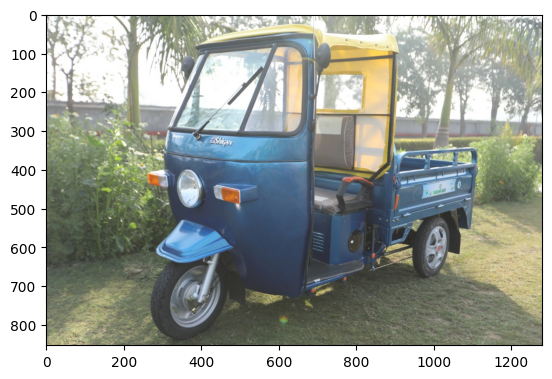

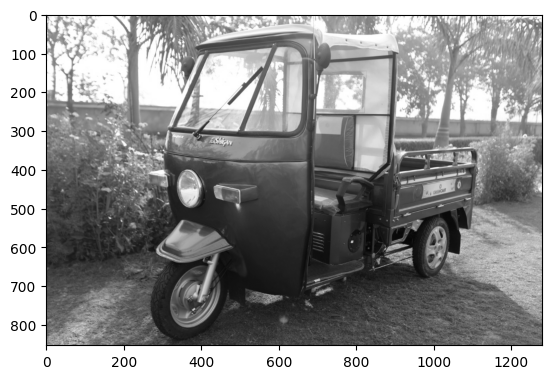

In [7]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb_image)
plt.show()
plt.imshow(gray_image, cmap='gray')
plt.show()

In [8]:
IMAGE_INPUT_SIZE = 128
dataset_dir = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles"

## Folder Read

In [9]:
for folder_name in os.listdir(dataset_dir):
    print(folder_name)
    

Auto Rickshaws
Bikes
Cars
Motorcycles
Planes
Ships
Trains


## Folder Path

In [10]:
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    print(folder_path)

C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Auto Rickshaws
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Bikes
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Cars
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Motorcycles
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Planes
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Ships
C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Vehicles\Trains


## File Name

In [11]:
# for folder_name in os.listdir(dataset_dir):
#     folder_path = os.path.join(dataset_dir, folder_name)
#     for file_name in os.listdir(folder_path):
#         print(file_name)

## Full Function

In [12]:
def read_dataset(dataset_dir, image_size, is_fit_transform = False):
    X=[]
    Y=[]
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir,folder_name)
        for file_name in os.listdir(folder_path):
            file_path  = os.path.join(folder_path,file_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
            img = img.reshape((IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1))
            X.append(img)
            Y.append(folder_name)
    x = np.array(X)
    original_labels = ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
    label_encoder = LabelEncoder()
    label_encoder=label_encoder.fit(original_labels)
    if is_fit_transform:
        y = label_encoder.fit_transform(Y)
    else:
        y = label_encoder.transform(Y)
    return x,y 

In [13]:
x,y = read_dataset(dataset_dir, IMAGE_INPUT_SIZE, is_fit_transform = True)

In [14]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)


print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(5415, 128, 128, 1)
(5415,)
(4332, 128, 128, 1)
(4332,)
(1083, 128, 128, 1)
(1083,)


In [15]:
print(len(folder_name))

6


In [16]:
model = keras.Sequential([
    Input(shape=(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1)),
    
    Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu'),   
    MaxPool2D(),

    Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),  
    MaxPool2D(),                                                           

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(),   

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(), 
    
    Flatten(),
    
    Dense(100, activation='relu', kernel_regularizer=L2(l2=0.001)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,254,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,647,747 (6.29 MB)

 Trainable params: 1,647,747 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
o = Adam(learning_rate= 0.001)
model.compile(optimizer=o,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
History = model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=150,
    validation_data = (x_val, y_val),
    callbacks=[
        EarlyStopping(patience=2, verbose=1, restore_best_weights=True), 
    ]
)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 931ms/step - accuracy: 0.1554 - loss: 4.8883 - val_accuracy: 0.3315 - val_loss: 2.0711
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 844ms/step - accuracy: 0.2929 - loss: 1.9601 - val_accuracy: 0.4469 - val_loss: 1.7330
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 820ms/step - accuracy: 0.4367 - loss: 1.6577 - val_accuracy: 0.5522 - val_loss: 1.4647
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 861ms/step - accuracy: 0.5245 - loss: 1.4254 - val_accuracy: 0.6741 - val_loss: 1.1200
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 796ms/step - accuracy: 0.6189 - loss: 1.2052 - val_accuracy: 0.7248 - val_loss: 0.9526
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 842ms/step - accuracy: 0.6581 - loss: 1.1073 - val_accuracy: 0.7470 - val_loss: 0.8569
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 857ms/step - accuracy: 0.7184 - loss: 0.9622 - val_accuracy: 0.7830 - val_loss: 0.7971
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 825ms/step - accuracy: 0.7463 - loss: 0.8842 - val_accu

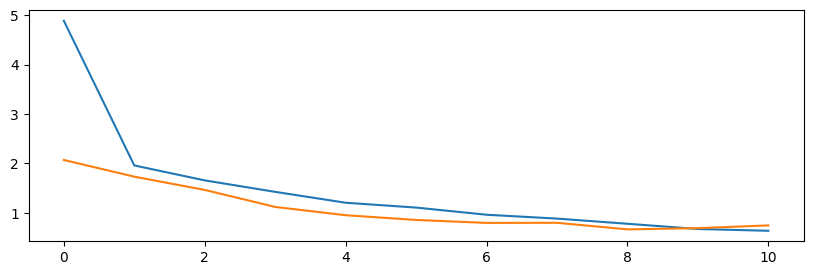

In [20]:
figsize = plt.figure(figsize=(10,3))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.show()

## Prediction with Testing Data

In [21]:
testing_dir = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\archive\Testing Data"
x_test ,y_test = read_dataset(testing_dir, IMAGE_INPUT_SIZE)
model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8114 - loss: 0.7260


[0.7259566783905029, 0.8114285469055176]

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[[7.8595150e-03 9.4834292e-01 1.0415651e-03 2.8795404e-02 6.5403705e-04
  1.2711559e-02 5.9494731e-04]]
Predicted vehicle: Bikes


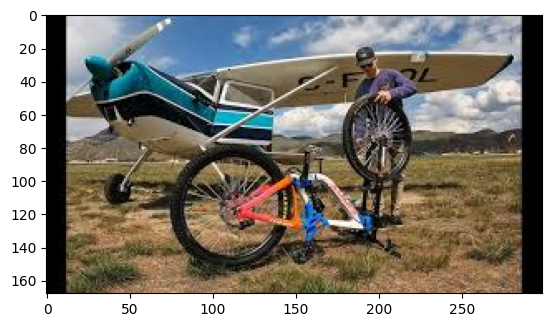

In [22]:
img = cv2.imread(r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\images.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128,128))
img = img.reshape((1,128,128,1))
z = model.predict(img)
print(z)
z = np.argmax(z)
z = int(z)
original_labels = ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
label_encoder = LabelEncoder()
label_encoder=label_encoder.fit(original_labels)
predicted_label = label_encoder.inverse_transform([z])[0]
print("Predicted vehicle:", predicted_label)


In [23]:
##############################################################################################################################